<a href="https://colab.research.google.com/github/Black3rror/AI/blob/master/ANN_course_takehome_Q2_(clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# <-- first add datasets to the `Files`  <--

---
#importing stuff

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

!pip install minisom
from minisom import MiniSom

from sklearn import metrics

---
#data preparation

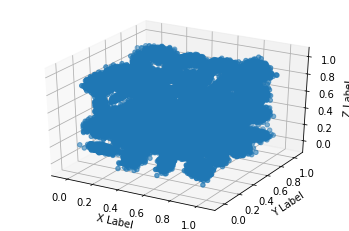

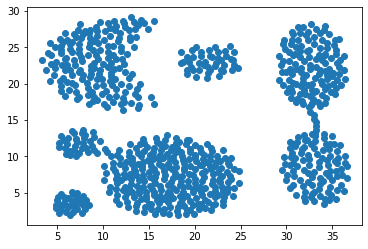

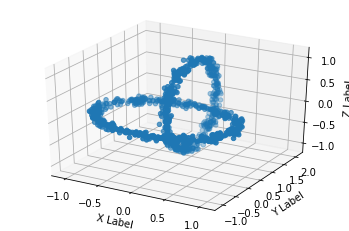

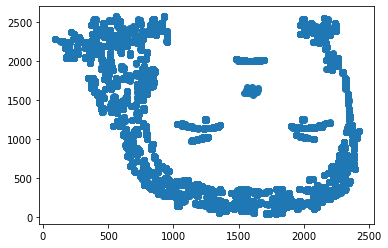

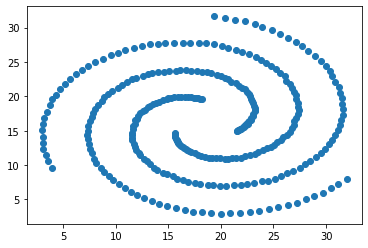

In [ ]:
dataset_3D64        = np.genfromtxt('3D64.csv',        delimiter=',')
dataset_aggregation = np.genfromtxt('Aggregation.txt', delimiter='\t')
dataset_chainlink   = np.genfromtxt('chainlink.txt',   delimiter='\t')
dataset_girl        = np.genfromtxt('girl.csv',        delimiter=',')
dataset_spiral      = np.genfromtxt('spiral.txt',      delimiter='\t')

datasets = [dataset_3D64, dataset_aggregation, dataset_chainlink, 
            dataset_girl, dataset_spiral]

datasets_count = 5

"""
clusters_count_3D64 =        64
clusters_count_aggregation = 7
clusters_count_chainlink =   2
clusters_count_girl =        9
clusters_count_spiral =      3
"""

clusters_count = [64, 7, 2, 9, 3]

"""
dim_3D64 =        3
dim_aggregation = 2
dim_chainlink =   3
dim_girl =        2
dim_spiral =      2
"""

dim = [3, 2, 3, 2, 2]

X = []
y = []

for i in range(datasets_count):
  X.append(datasets[i][:, 0:dim[i]])
  y.append(datasets[i][:, dim[i]])

  fig = plt.figure()
  if dim[i] == 2:
    plt.scatter(X[i][:,0], X[i][:,1])
  elif dim[i] == 3:
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[i][:,0], X[i][:,1], X[i][:,2])
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
  plt.show()

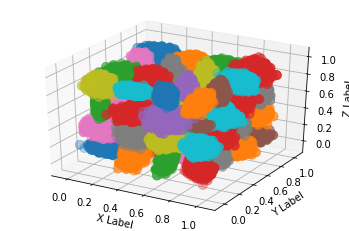

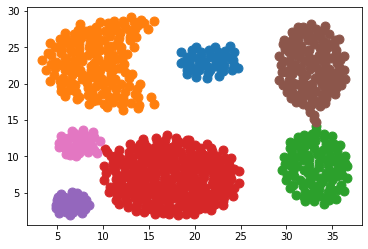

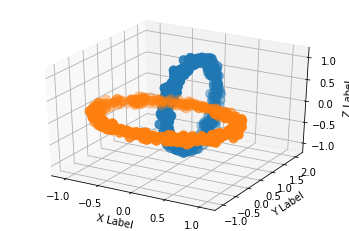

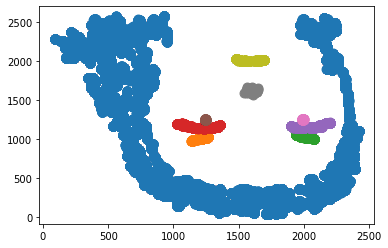

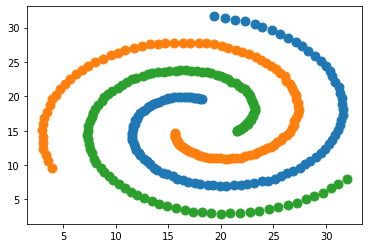

In [ ]:
for m in range(datasets_count):
  clusters = []
  for i in range(clusters_count[m]):
    clusters.append(X[m][y[m]==i+1, :])

  fig = plt.figure()
  
  if dim[m] == 2:
    for c in clusters:
      plt.scatter(c[:, 0], c[:, 1], s=80)
    plt.show()

  elif dim[m] == 3:
    ax = fig.add_subplot(111, projection='3d')
    for c in clusters:
      ax.scatter(c[:, 0], c[:, 1], c[:, 2], s=80)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

---
#K-Means stuff

In [ ]:
kmeans = []
kmeans_y = []

for m in range(datasets_count):
  kmeans.append(KMeans(n_clusters=clusters_count[m], init='k-means++', max_iter=300, n_init=10, random_state=0))
  kmeans_y.append(kmeans[m].fit_predict(X[m]))

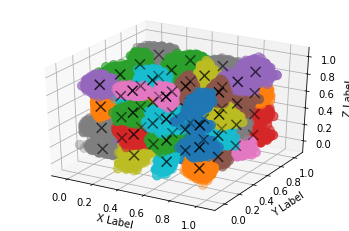

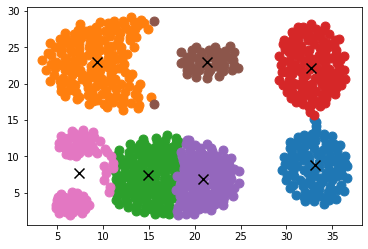

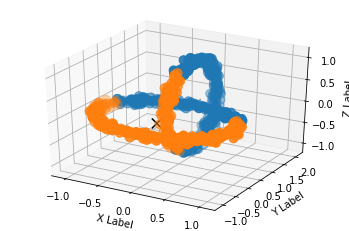

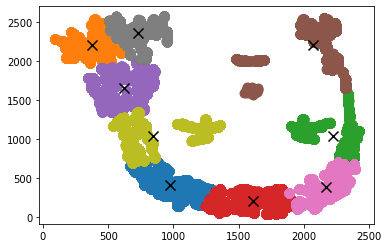

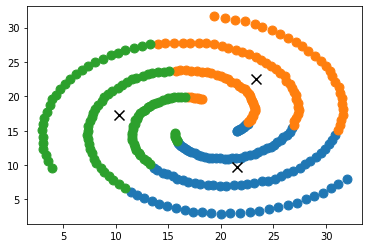

In [ ]:
for m in range(datasets_count):
  clusters = []
  for i in range(clusters_count[m]):
    clusters.append(X[m][kmeans_y[m]==i, :])

  # plot time
  fig = plt.figure()
  
  if dim[m] == 2:
    for c in clusters:
      plt.scatter(c[:, 0], c[:, 1], s=80)
    
    plt.scatter(kmeans[m].cluster_centers_[:, 0], kmeans[m].cluster_centers_[:, 1], s=100, c='k', marker='x')
    plt.show()

  elif dim[m] == 3:
    ax = fig.add_subplot(111, projection='3d')
    for c in clusters:
      ax.scatter(c[:, 0], c[:, 1], c[:, 2], s=80)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    ax.scatter(kmeans[m].cluster_centers_[:, 0], kmeans[m].cluster_centers_[:, 1], 
               kmeans[m].cluster_centers_[:, 2], s=100, c='k', marker='x')




---
#SOM stuff


In [ ]:
"""
clusters_count_3D64 =        64
clusters_count_aggregation = 7
clusters_count_chainlink =   2
clusters_count_girl =        9
clusters_count_spiral =      3
"""

soms_shape = [(8, 8), (1, 7), (1, 2), (3, 3), (1, 3)]
soms = []
for m in range(datasets_count):
  soms.append(MiniSom(soms_shape[m][0], soms_shape[m][1], dim[m], sigma=0.5, learning_rate=0.5))
  soms[m].train_random(X[m], 100)

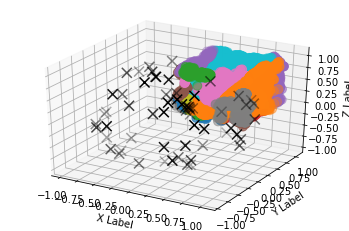

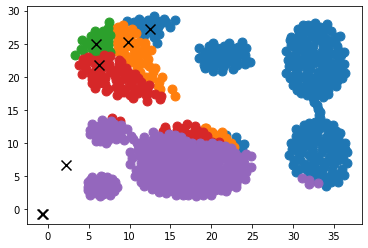

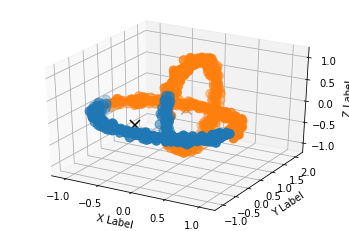

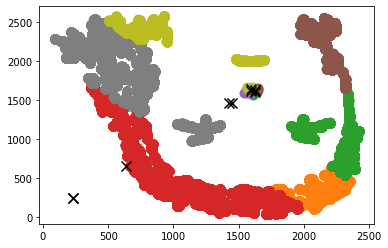

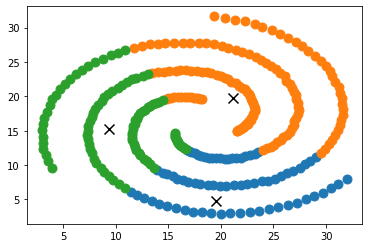

In [ ]:
som_y = []
for m in range(datasets_count):
  winner_coordinates = np.array([soms[m].winner(x) for x in X[m]]).T
  pred_y = np.ravel_multi_index(winner_coordinates, soms_shape[m])
  som_y.append(pred_y)

  clusters = []
  for i in range(clusters_count[m]):
    clusters.append(X[m][pred_y==i, :])


  # plot time
  fig = plt.figure()
  
  if dim[m] == 2:
    for c in clusters:
      plt.scatter(c[:, 0], c[:, 1], s=80)
    
    for center in soms[m].get_weights():
      plt.scatter(center[:, 0], center[:, 1], s=100, c='k', marker='x')
    plt.show()

  elif dim[m] == 3:
    ax = fig.add_subplot(111, projection='3d')
    for c in clusters:
      ax.scatter(c[:, 0], c[:, 1], c[:, 2], s=80)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    for center in soms[m].get_weights():
      ax.scatter(center[:, 0], center[:, 1], center[:, 2], s=100, c='k', marker='x')

---
#Clustering correction

In [ ]:
def most_common(arr):
  if not arr.size:   # arr is empty
    return -1
  else:
    return np.bincount(arr).argmax()

In [ ]:
# K-means
kmeans_Y = []

for m in range(datasets_count):
  #print(m)
  Y = kmeans_y[m].copy()

  rep_nums = []   # holding replaced nums to do not replace them again
  for i in range(clusters_count[m]):
    temp = kmeans_y[m][y[m][:]==i+1]
    replace_num = most_common(temp)
    flag = True
    while replace_num in rep_nums and flag == True:
      temp = temp[temp[:]!=replace_num]   # delete used most common val
      replace_num = most_common(temp)
      if replace_num == -1:
        flag = False
    rep_nums.append(replace_num)
    Y[kmeans_y[m][:]==replace_num] = i+1
    #print(replace_num, " -> ", i+1)
  
  kmeans_Y.append(Y)


In [ ]:
# SOM
som_Y = []

for m in range(datasets_count):
  #print(m)
  Y = som_y[m].copy()

  rep_nums = []   # holding replaced nums to do not replace them again
  for i in range(clusters_count[m]):
    temp = som_y[m][y[m][:]==i+1]
    replace_num = most_common(temp)
    flag = True
    while replace_num in rep_nums and flag == True:
      temp = temp[temp[:]!=replace_num]   # delete used most common val
      replace_num = most_common(temp)
      if replace_num == -1:
        flag = False
    rep_nums.append(replace_num)
    Y[som_y[m][:]==replace_num] = i+1
    #print(replace_num, " -> ", i+1)
  
  som_Y.append(Y)

---
#Comparison

##Purity

In [ ]:
for m in range(datasets_count):
  temp = y[m][y[m][:] == kmeans_Y[m][:]]
  print(len(temp)/len(y[m]))

print("\n\n\n")

for m in range(datasets_count):
  temp = y[m][y[m][:] == som_Y[m][:]]
  print(len(temp)/len(y[m]))

0.99440625
0.9390862944162437
0.653
0.27741935483870966
0.34294871794871795




0.114296875
0.19289340101522842
0.721
0.5096021505376344
0.3557692307692308


##Rand-index

In [ ]:
for m in range(datasets_count):
  print(metrics.adjusted_rand_score(y[m], kmeans_Y[m]))

print("\n\n\n")

for m in range(datasets_count):
  print(metrics.adjusted_rand_score(y[m], som_Y[m]))

0.9886835097936347
0.9488272435356067
0.09272782327563994
0.013531829994537775
-0.005844259479348663




0.09184576786038572
0.4337702820856898
0.1946373161715178
0.08088181177104398
-0.001812590352010407


##F-measure

In [ ]:
for m in range(datasets_count):
  print(metrics.f1_score(y[m], kmeans_Y[m], average='macro'))

print("\n\n\n")

for m in range(datasets_count):
  print(metrics.f1_score(y[m], som_Y[m], average='macro'))

0.9944047660603489
0.7919098820968966
0.6529996529996529
0.08116001387728601
0.3427922914308008




0.07868155762895715
0.14076011314959588
0.7139491321585767
0.1978680299705982
0.35163484525141936
